In [ ]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:

!git config --global user.email "ghayalyash@gmail.com"
!git config --global user.name "yashghayal"
!git add .
!git commit -m "first commit"

!git branch -M main
!git push -u origin main




On branch main
nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random


In [ ]:
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)

  print(type(train_data))

  x_train, y_train = train_data['features'], train_data['labels']
  x_test, y_test = test_data['features'], test_data['labels']
  x_val, y_val = val_data['features'], val_data['labels']


<class 'dict'>


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)


(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [ ]:
assert(x_train.shape[0] == y_train.shape[0]), "The number of images is not equal to number of labels"
assert(x_test.shape[0] == y_test.shape[0]), "The number of images is not equal to number of labels"
assert(x_val.shape[0] == y_val.shape[0]), "The number of images is not equal to number of labels"
assert(x_train.shape[1:] == (32,32,3)), "The dimensions of image are not 32*32*3"
assert(x_test.shape[1:] == (32,32,3)), "The dimensions of image are not 32*32*3"
assert(x_val.shape[1:] == (32,32,3)), "The dimensions of image are not 32*32*3"


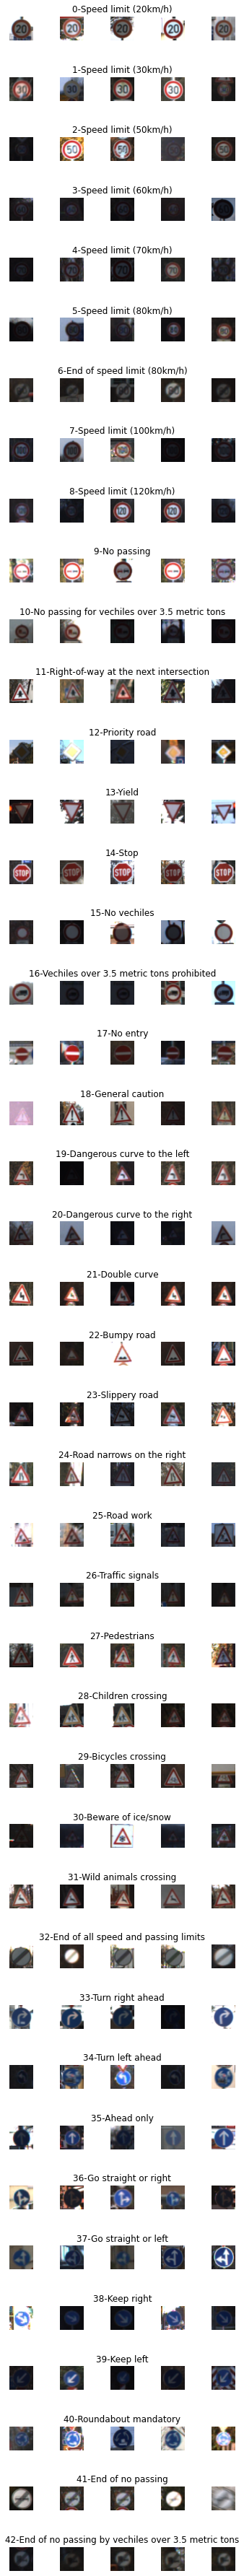

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

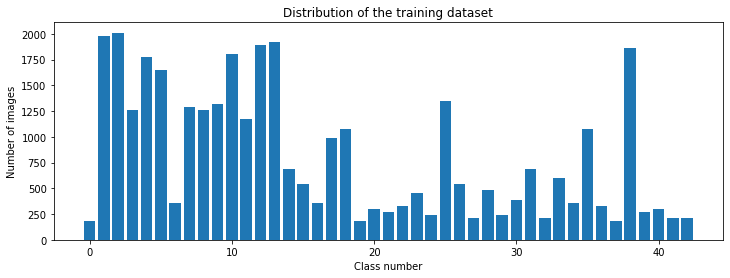

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


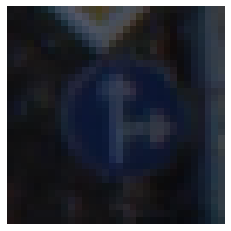

In [ ]:
import cv2
plt.imshow(x_train[1000])
plt.axis("off")
print(x_train[1000].shape)
print(y_train[1000])


(32, 32)


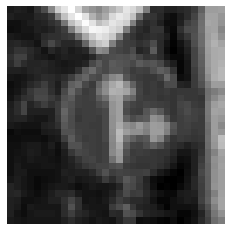

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(x_train[1000])
plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.axis("off")
print(img.shape)

(32, 32)


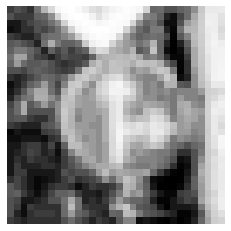

In [ ]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img


img = equalize(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis("off")
print(img.shape)

In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

x_train = np.array(list(map(preprocessing , x_train)))
x_test = np.array(list(map(preprocessing, x_test)))
x_val = np.array(list(map(preprocessing, x_val)))

(34799, 32, 32)


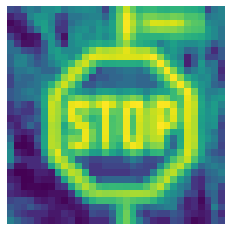

In [ ]:
plt.imshow(x_train[random.randint(0, len(x_train) -1)])
plt.axis("off")
print(x_train.shape)

In [ ]:
x_train = x_train.reshape(34799, 32, 32, 1)
x_test = x_test.reshape(12630, 32, 32, 1)
x_val = x_val.reshape(4410, 32, 32, 1)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, zoom_range = 0.2, shear_range = 0.1, rotation_range = 10.)
datagen.fit(x_train)

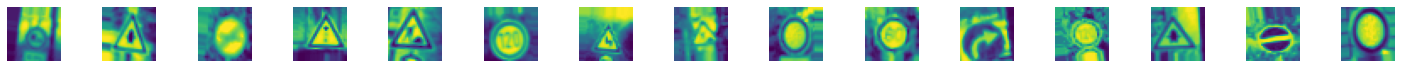

In [ ]:
batches = datagen.flow(x_train, y_train, batch_size = 15)
x_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize = (20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(x_batch[i].reshape(32,32))
  axs[i].axis("off")

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [ ]:
def lenet_Model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape = (32, 32, 1), activation = 'relu'))
  model.add(Conv2D(60, (5,5), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Conv2D(30, (3,3), activation = 'relu'))
  model.add(Conv2D(30, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  #model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model


In [ ]:
model = lenet_Model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

In [ ]:
h = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 10), steps_per_epoch = 2000, epochs = 10, shuffle = 1, validation_data= (x_val, y_val))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2000/2000 [==============================] - 47s 7ms/step - loss: 2.7692 - accuracy: 0.2472 - val_loss: 0.3561 - val_accuracy: 0.8810
Epoch 2/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6980 - accuracy: 0.7824 - val_loss: 0.1803 - val_accuracy: 0.9433
Epoch 3/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4228 - accuracy: 0.8693 - val_loss: 0.1776 - val_accuracy: 0.9454
Epoch 4/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.3194 - accuracy: 0.8986 - val_loss: 0.0716 - val_accuracy: 0.9782
Epoch 5/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.2967 - accuracy: 0.9126 - val_loss: 0.0936 - val_accuracy: 0.9726
Epoch 6/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.2461 - accuracy: 0.9260 - val_loss: 0.0924 - val_accuracy: 0.9764
Epoch 7/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.2287 - accuracy: 0.9293 - val_loss: 0.0667 - val_ac

Text(0, 0.5, 'epochs')

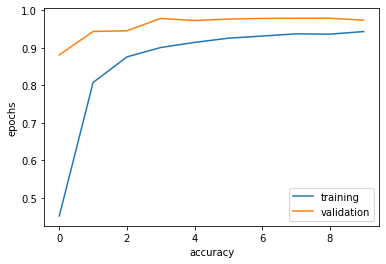

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.xlabel('accuracy')
plt.ylabel('epochs')

Text(0, 0.5, 'epochs')

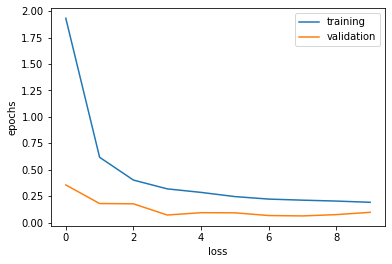

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['training', 'validation'])
plt.xlabel('loss')
plt.ylabel('epochs')

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test score is', score[0])
print('Test accuracy is', score[1])

Test score is 0.21012552082538605
Test accuracy is 0.9492478370666504


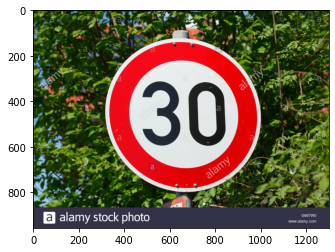

In [ ]:
#import image
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


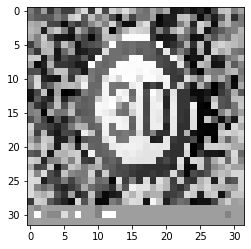

In [ ]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
#Reshape 
img = img.reshape(1, 32, 32, 1)

In [ ]:
#Test image
test_img = model.predict_classes(img)
print("predicted sign is"+ str(test_img))


predicted sign is[1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
